In [1]:
# Вариант 27
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#ЗАДАНИЕ 5.1.27
#исходные даные
x = np.array([-0.4,-0.05,0.3,0.65,1,1.35,1.7,2.05,2.4])
y = np.array([0.918,1.258,0.685,-1.314,-1.709,-3.446,-2.473,0.084,6.031])

In [31]:
#отклонение
def error(p, x, y, m):
    return np.linalg.norm(p(x) - y)/np.sqrt(len(x) - m)

#mnk - метод наименьших квадратов
def mnk(x, y, m):
    #формируем вектор правой части
    xj = np.array([x**j for j in range(0, m + 1)])
    b = xj@y
    #формируем матрицу
    matr = np.empty((m + 1, m + 1))
    elem = xj.sum(axis = 1)
    for i in range (0, m + 1):
        matr[i,:] = elem
        elem = np.roll(elem, -1)
        elem[-1] = np.sum(x**(i+m+1))
    #решаем систему
    a = np.linalg.solve(matr, b)[::-1]
    return a

In [4]:
#многочлены Pm, m=0,1,2,..., по методу наименьших квадратов
pol = np.array([np.poly1d(mnk(x, y, m)) for m in range(0, len(x))])
#соответствующие им значения отклонения
er = np.array([error(p, x, y, p.order) for p in pol])

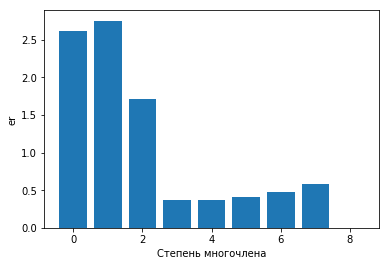

In [5]:
#Построить гистограмму зависимости отклонения от m
plt.bar(range(0, len(pol)), er)
plt.xlabel('Степень многочлена');
plt.ylabel('er');

In [6]:
print('Минимальная ошибка при степени', er.argmin(), ' = ', min(er))
#Выбираем оптимальную степень m* многочлена наилучшего среднеквадратичного приближения = 8

Минимальная ошибка при степени 8  =  1.993625232807738e-07


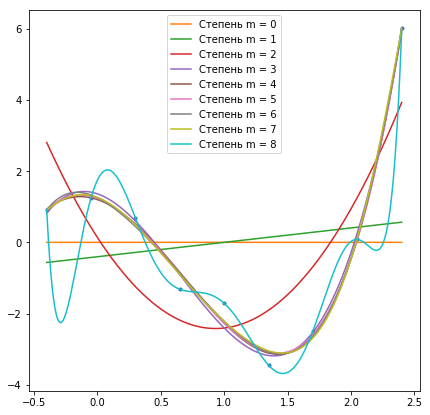

In [7]:
#графики многочленов Pm, m=0,1,2,..., m*, и точечный график исходной функции
plt.figure(figsize = (7, 7));
plt.plot(x, y, '.');
for i in range(0, len(pol)):
    plt.plot(np.arange(-0.4, 2.4, 0.001), pol[i](np.arange(-0.4, 2.4, 0.001)), label = "Степень m = " + str(i))
    plt.legend()
plt.show()

In [8]:
#ЗАДАНИЕ 5.4.6
%matplotlib inline

1.755840331337849e-05


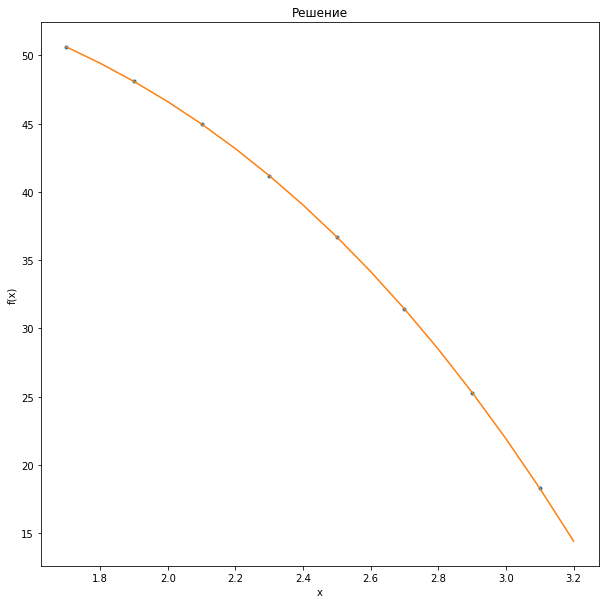

In [12]:
m = 3
y_u = 7
x = np.array([1.7, 1.9, 2.1, 2.3, 2.5, 2.7, 2.9, 3.1])
y = np.array([50.6, 48.1, 45.0, 41.2, 36.7, 31.4, 25.3, 18.3])
b, a = mnk(x**m, y, 1)

fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(x, y,'.');
x_range = np.arange(1.7, 3.2, 0.1)
ax.plot(x_range, a+(b*(x_range**m)))
ax.set_title('Решение');

ax.set_xlabel(u'x');
ax.set_ylabel(u'f(x)');

print(((y_u - a)/b)**(-m))

In [11]:
#ЗАДАНИЕ 5.5.14 

In [173]:
#данные 
a=2
b=3
x=np.array([-1+0.1*k for k in range (0,21)])
y=np.array([2.002,1.7937,0.39,-0.9052,-1.0023,0.0001,1.0025,0.9054,-0.37,-1.7940,-2.003,-0.5597,1.6174,2.9025,2.2468,
           0.001,-2.2365,-2.902,1.6172,0.5593,2.0004])

In [177]:
#y=c1+c2*cos(b*pi*x)/sin(a*pi*x)
y_new=y/np.cos(b*np.pi*x)
x_new = np.sin(a*np.pi*x)/np.cos(b*np.pi*x)
c2, c1 = mnk(x_new, y_new, 1)